# SPACEc: Cellular Neighborhood Analysis

### Set up environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import HDBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as mcolors
import concave_hull
from concave_hull import concave_hull_indexes
import os
import sys
import seaborn as sns

data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/' # where the data is stored
code_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/pipeline_test_112023/src' # current where the code is stored, this will be replaced by pip install soon
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/output_112023/' #where you want to store the output

if not os.path.exists(output_dir): # check if output path exist - if not generate the path
    os.makedirs(output_dir)
    
sys.path.append(code_dir) 
from helperfunctions_hf import * # Helper functions - used by other functions to execute steps like table formatting etc. KEY: hf
from preprocessing_pp import * # Preprocessing functions - to normalize and prepare data for further analysis KEY: pp
from tools_tl import * # tools - perform calculation on the data KEY: tl
from plot_pl import * # plotting functions - used to visualize results KEY: pl

sc.settings.set_figure_params(dpi=80, facecolor='white')

In [2]:
adata = sc.read(output_dir + 'adata_nn_demo_annotated_cn.h5ad')
adata

AnnData object with n_obs × n_vars = 48776 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'region', 'unique_region', 'condition', 'leiden_0.4', 'leiden_0.4_subcluster_0', 'leiden_0.4_subcluster_3', 'leiden_0.4_subcluster_4', 'celltype', 'leiden_0.4_subcluster_2', 'leiden_0.4_subcluster_11', 'leiden_0.4_subcluster_0sub', 'celltype_fine', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'Centroid_k20_n6', 'celltype_colors', 'celltype_fine_colors', 'dendrogram_leiden_0.4', 'dendrogram_leiden_0.4_subcluster_4', 'leiden', 'leiden_0.4_colors', 'leiden_0.4_subcluster_0sub_colors', 'leiden_0.4_subcluster_4_colors', 'neighbors', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

Estimated number of clusters: 4
Estimated number of noise points: 18


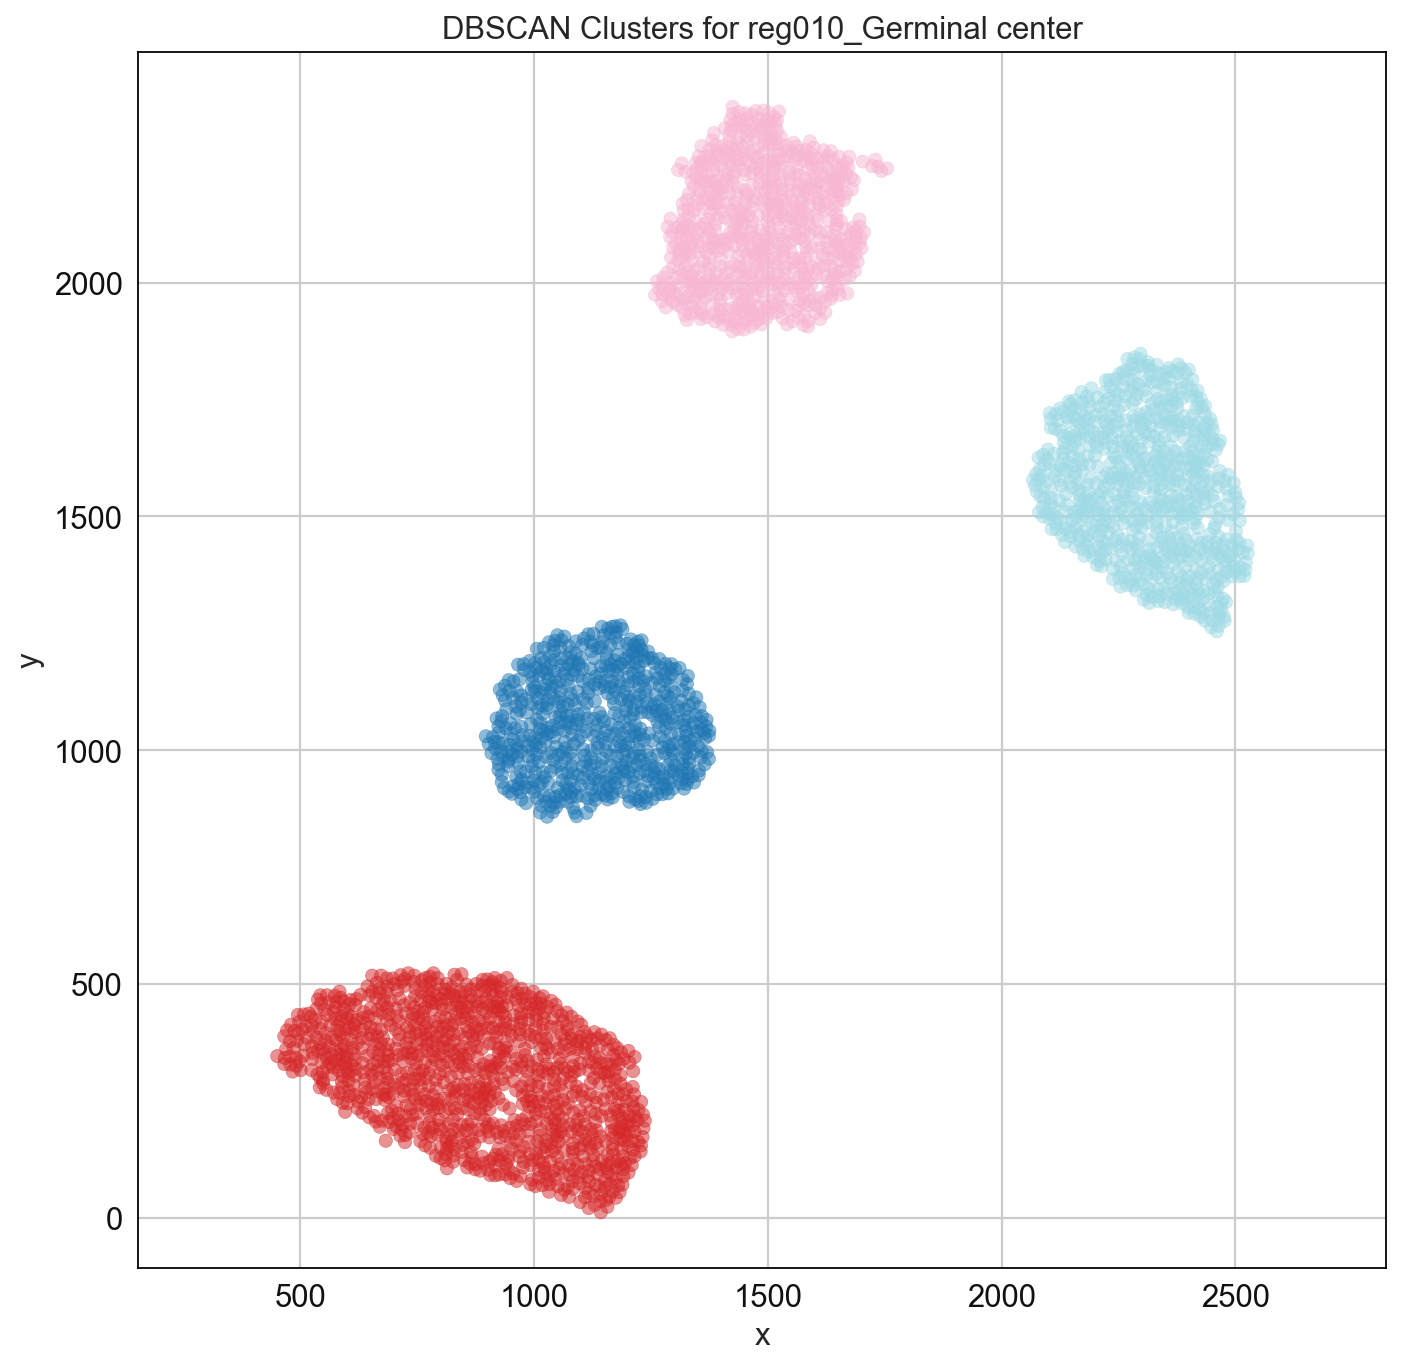

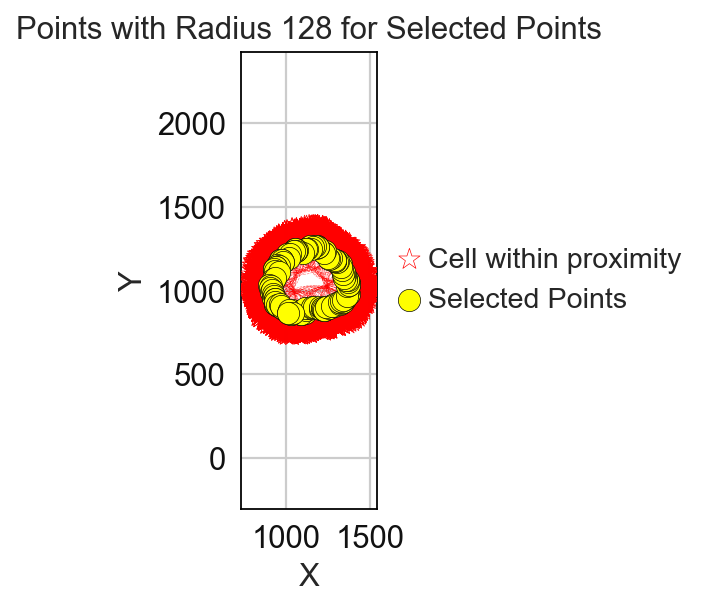

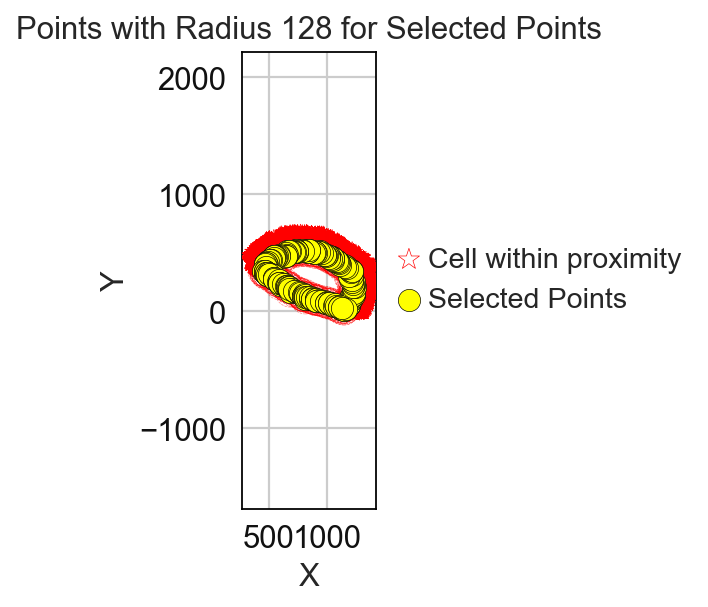

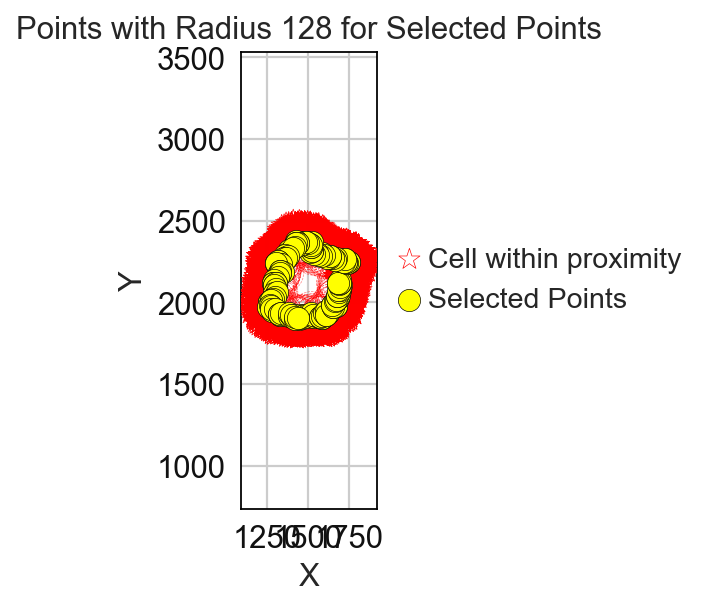

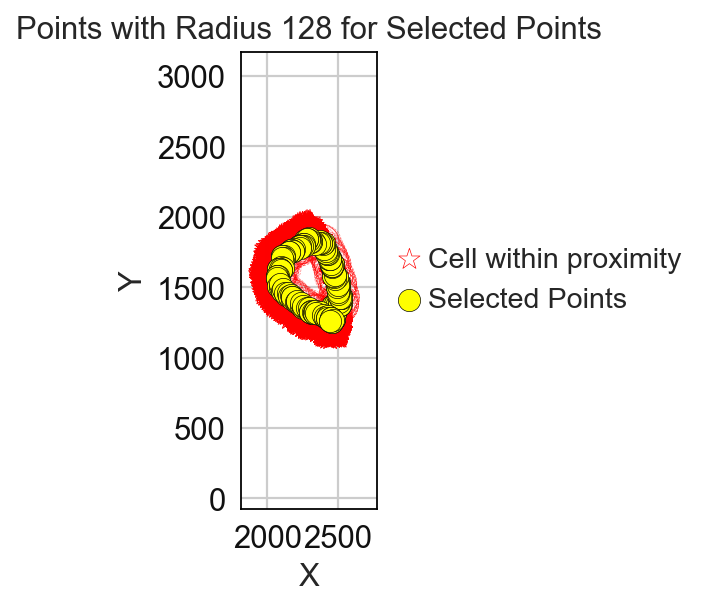

Finished reg010_Germinal center
Estimated number of clusters: 2
Estimated number of noise points: 0


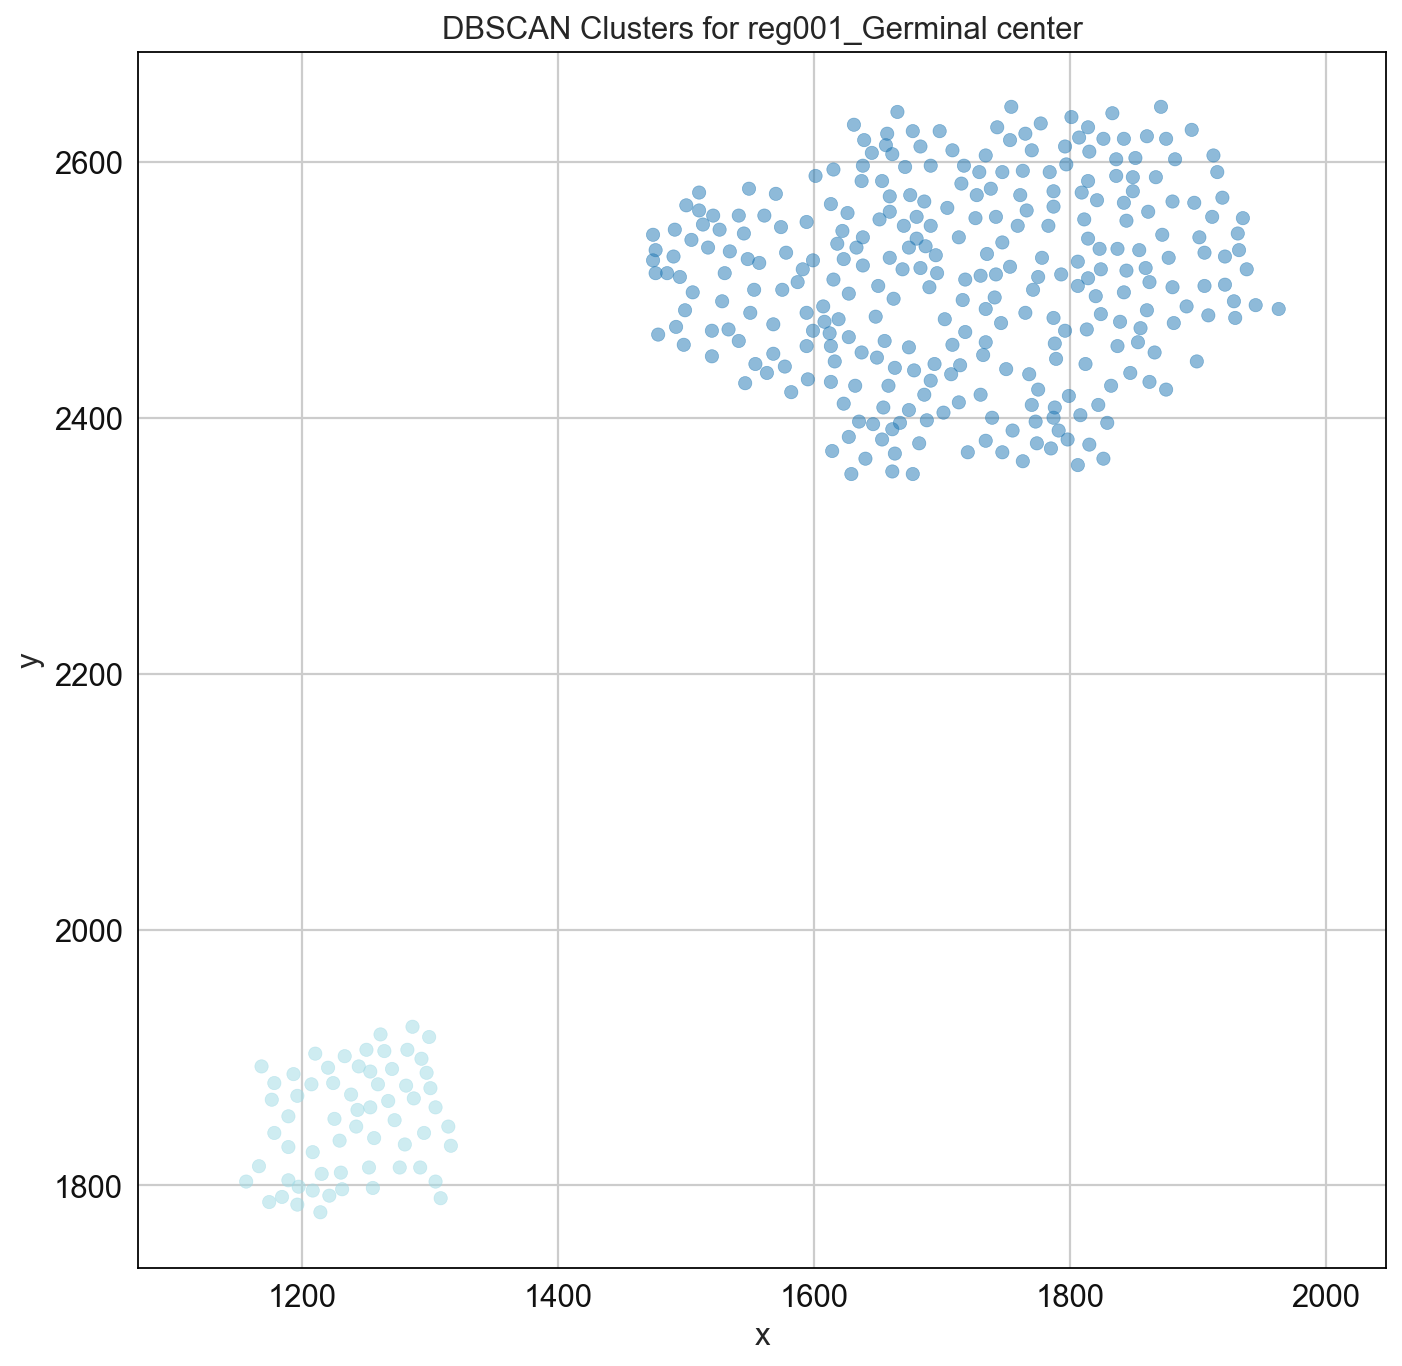

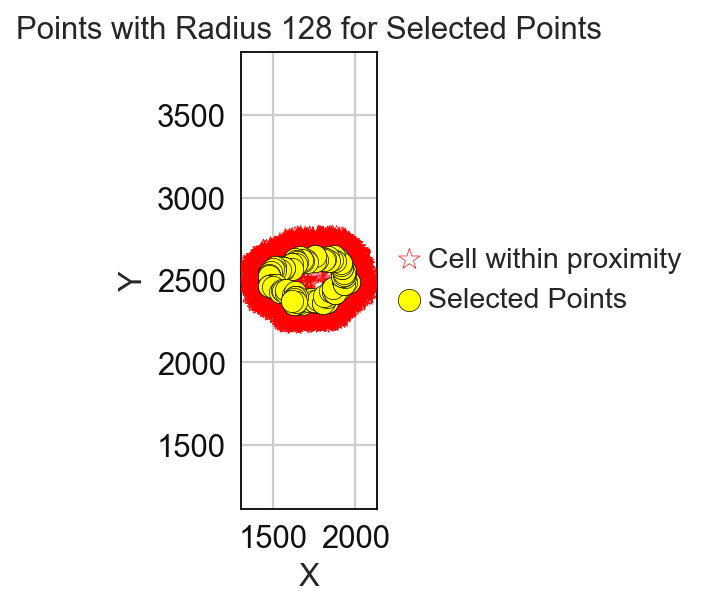

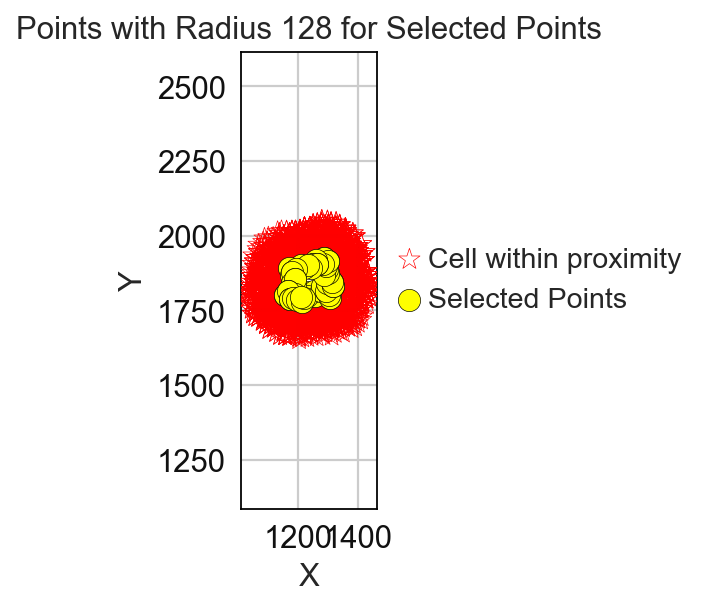

Finished reg001_Germinal center


In [3]:
# this region result is also saved to adata.uns
region_results = tl_patch_proximity_analysis(adata, 
                                             region_column = "unique_region", 
                                             patch_column = "CN_k20_n6_annot", 
                                             group="Germinal center",
                                             min_samples=50, 
                                             x_column='x', y_column='y', 
                                             radius = 128,
                                             edge_neighbours = 3,
                                             key_name = 'ppa_result',
                                             plot = True)

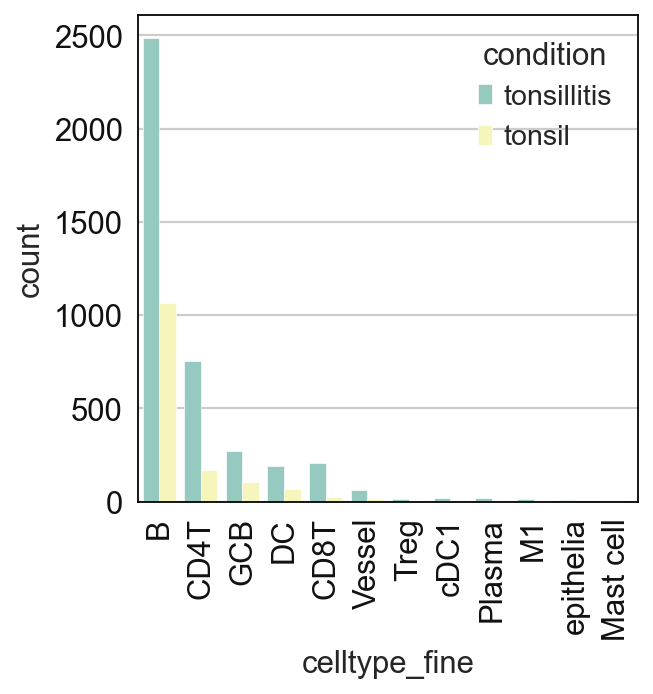

In [4]:
# plot the result to see the cell types enriched around the edge of the patches
pl_count_patch_proximity_res(adata, 
                           x="celltype_fine", 
                           hue="condition", 
                           palette="Set3",
                           order = True,
                           key_name = 'ppa_result',
                           savefig = False)